# Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 18})

## Data

In [19]:
I1 = np.array([1.01, 2.00, 3.02, 4.00, 4.99])
I2 = np.array([1.00, 2.02, 3.01, 4.00, 5.00])
I3 = np.array([1.00, 2.00, 3.00, 4.00, 5.00])
I4 = np.array([1.00, 1.99, 3.00, 4.01, 5.02])
R1 = 1.1775
R2 = 1.1723
R3 = 1.1655
R4 = 1.1797
V1 = R1 * I1
V2 = R2 * I2
V3 = R3 * I3
V4 = R4 * I4

In [20]:
file_name = ['h1.csv', 'h2.csv', 'h3.csv', 'h4.csv']
I = [I1, I2, I3, I4]
V = [V1, V2, V3, V4]
for i in range(4):
    data = np.array([I[i], V[i]]).T
    pd.DataFrame(data, columns=['I', 'V']).to_csv(file_name[i], index=False)

In [26]:
I1 = np.array([1.00, 2.00, 3.01, 4.00, 5.00])
I2 = np.array([1.00, 2.02, 3.01, 4.00, 5.00])
I3 = np.array([1.02, 2.00, 3.00, 4.00, 4.98])
I4 = np.array([1.00, 1.99, 3.00, 4.01, 5.01])
R1 = 1.0375
R2 = 1.0323
R3 = 1.0455
R4 = 1.0397
V1 = R1 * I1
V2 = R2 * I2
V3 = R3 * I3
V4 = R4 * I4

In [27]:
file_name = ['v1.csv', 'v2.csv', 'v3.csv', 'v4.csv']
I = [I1, I2, I3, I4]
V = [V1, V2, V3, V4]
for i in range(4):
    data = np.array([I[i], V[i]]).T
    pd.DataFrame(data, columns=['I', 'V']).to_csv(file_name[i], index=False)

In [38]:
I1 = np.array([1.00, 2.00, 3.01, 4.00, 5.00])
I2 = np.array([1.00, 1.99, 3.00, 4.01, 5.02])
I3 = np.array([1.02, 2.00, 3.00, 4.00, 4.98])
I4 = np.array([1.00, 1.99, 3.00, 4.01, 5.01])
R1 = 1.1775*0.098
R2 = 1.1723*0.1
R3 = 1.1655*0.11
R4 =1.1797*0.099
V1 = R1 * I1
V2 = R2 * I2
V3 = R3 * I3
V4 = R4 * I4

In [39]:
file_name = ['h_e1.csv', 'h_e2.csv', 'h_e3.csv', 'h_e4.csv']
I = [I1, I2, I3, I4]
V = [V1, V2, V3, V4]
for i in range(4):
    data = np.array([I[i], V[i]]).T
    pd.DataFrame(data, columns=['I', 'V']).to_csv(file_name[i], index=False)

## Plots

In [115]:
h1 = pd.read_csv('h1.csv')

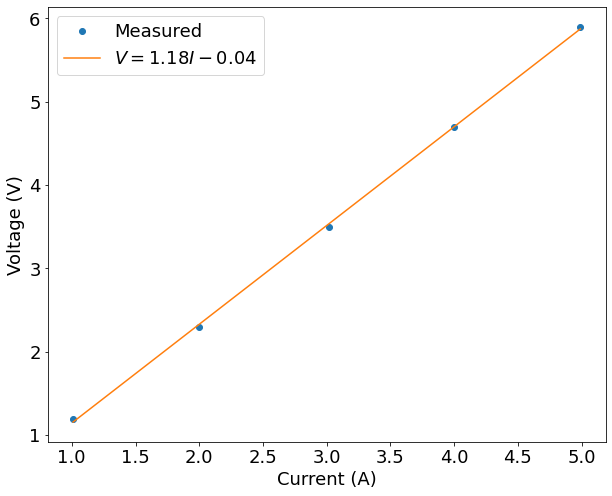

In [116]:
linmodel = linregress(h1['I'], h1['V'])
plt.plot(h1['I'], h1['V'], 'o', label='Measured')
label = f"$V = {linmodel.slope:.2f}I"
if linmodel.intercept > 0:
    label += f"+ {linmodel.intercept:.2f}$"
else:
    label += f" {linmodel.intercept:.2f}$"

plt.plot(h1['I'], linmodel.intercept + linmodel.slope * h1['I'], label=label)
plt.legend()
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)');

In [153]:
def plot_one(file_name, title="", xlabel="", ylabel="", ax=plt.gca):
    data = pd.read_csv(file_name)
    linmodel = linregress(data['I'], data['V'])
    ax.plot(data['I'], data['V'], 'o', label="Measured")
    label = f"$V = {linmodel.slope:.4f}I"
    # print(linmodel.intercept)
    if round(linmodel.intercept,2) >= 0:
        label += f"+ {linmodel.intercept:.2f}$"
    else:
        label += f" {linmodel.intercept:.2f}$"
    ax.plot(data['I'], linmodel.intercept + linmodel.slope * data['I'], label=label)
    ax.legend()
    ax.grid(which='major', ls="--")
    # ax.set_xlim(1, 5.5)
    # ax.set_ylim(1, 6)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return linmodel.slope

1.1846758032845053

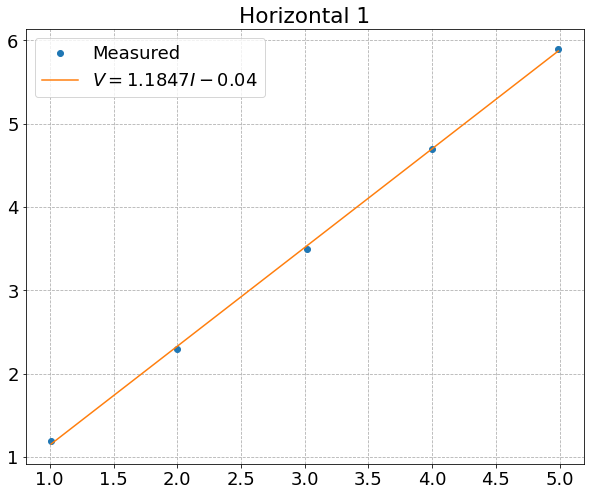

In [154]:
plot_one('h1.csv', 'Horizontal 1',ax= plt.gca())

R_net = 1.1800 Ohm


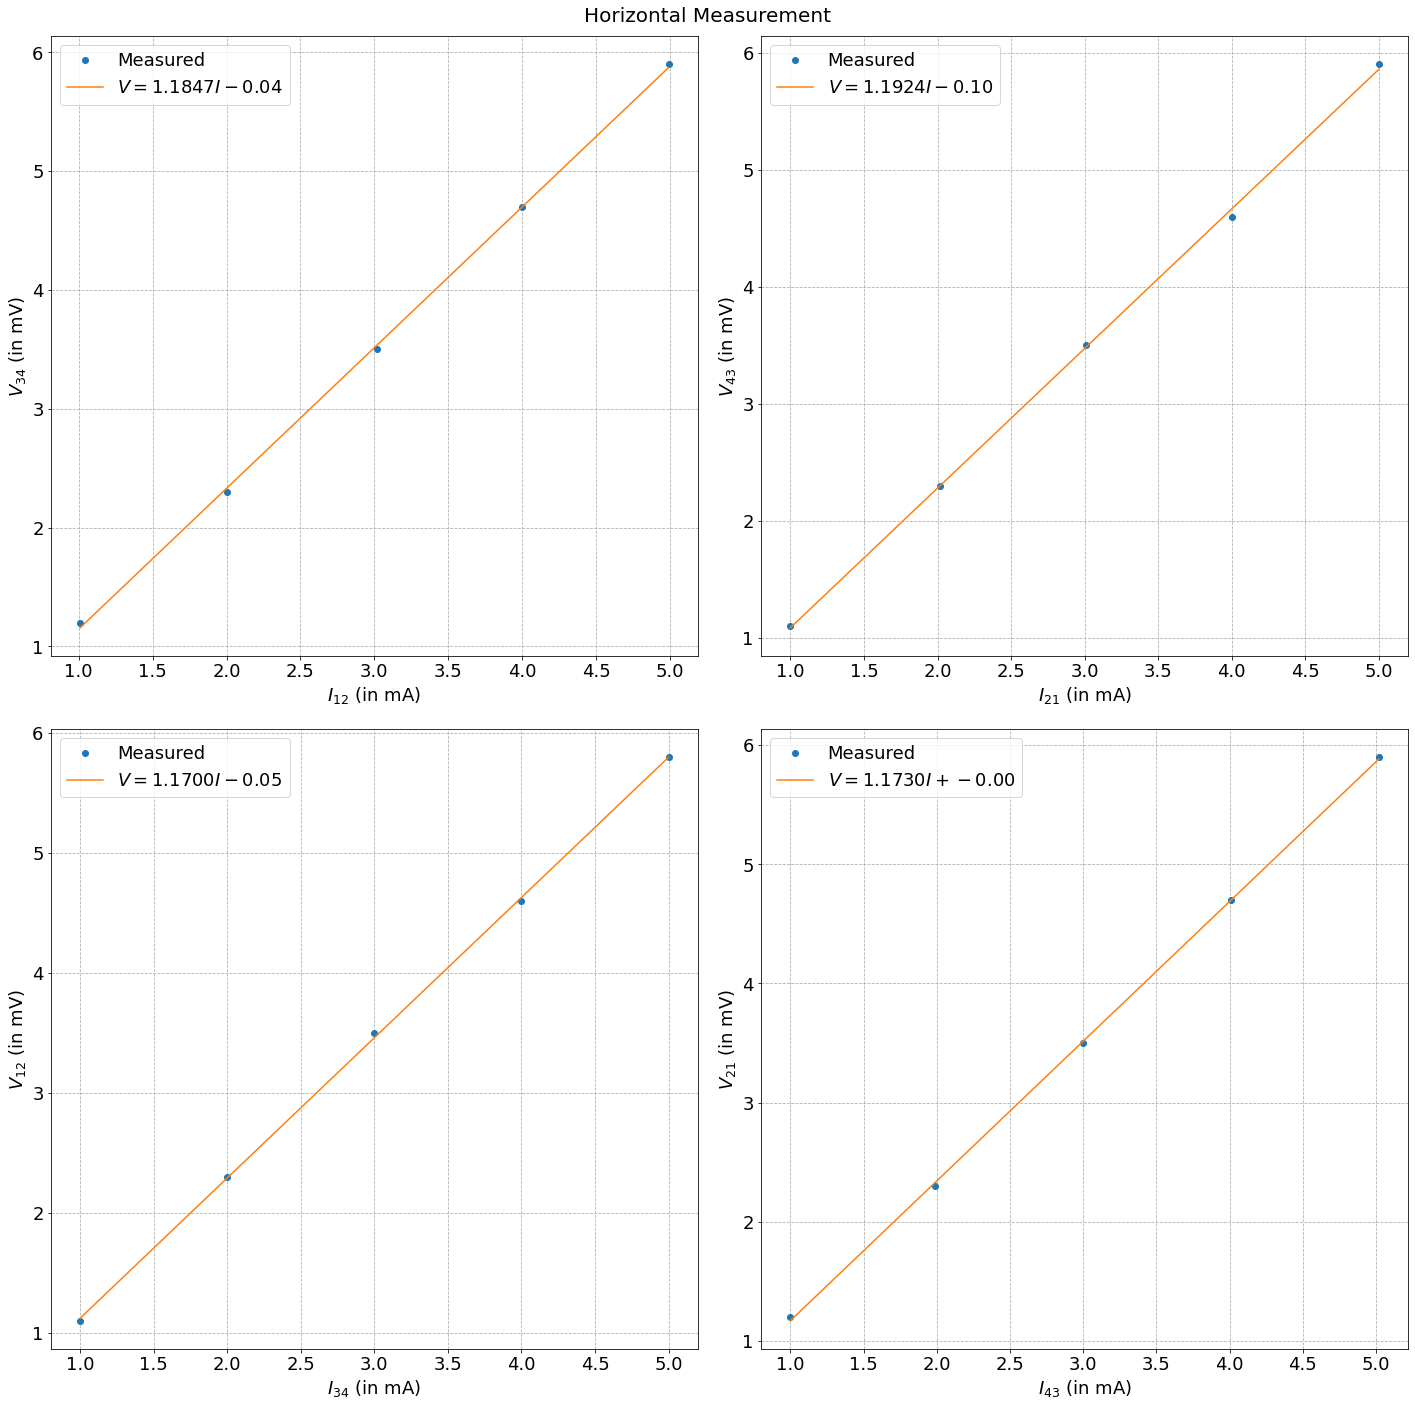

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
files = ['h1.csv', 'h2.csv', 'h3.csv', 'h4.csv']
titles = ["", "", "", ""]
xlabels = ["$I_{12}$ (in mA)", "$I_{21}$ (in mA)", "$I_{34}$ (in mA)", "$I_{43}$ (in mA)"]
ylabels = ["$V_{34}$ (in mV)", "$V_{43}$ (in mV)", "$V_{12}$ (in mV)", "$V_{21}$ (in mV)"]
fig.suptitle("Horizontal Measurement", fontsize=20)
R_net = 0
for i in range(4):
    R = plot_one(files[i], titles[i], xlabels[i], ylabels[i], ax=axes[i // 2, i % 2])
    R_net += R
fig.tight_layout()
# fig.subplots_adjust(top=0.9)
fig.savefig('horizontal.pdf', dpi=300)
print(f"R_net = {R_net/4:.4f} Ohm")

R_net = 1.0441 Ohm


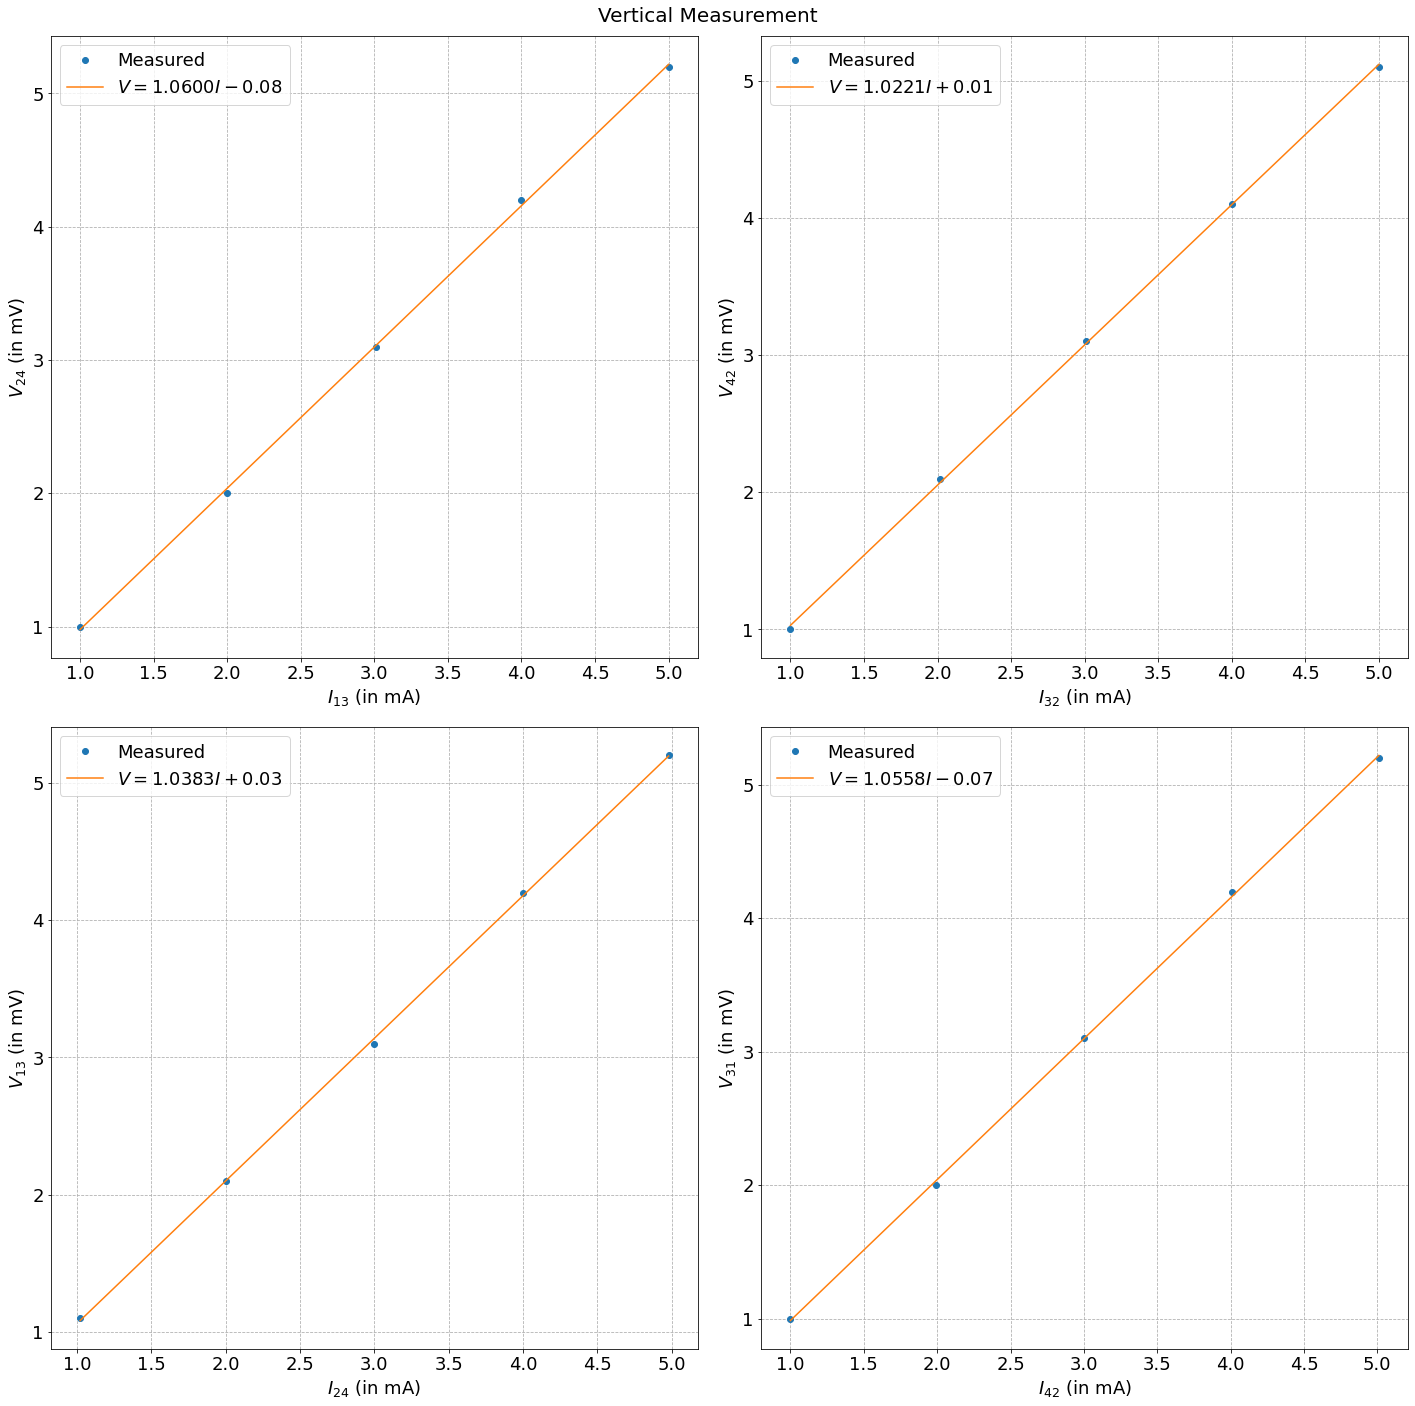

In [156]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
files = ['v1.csv', 'v2.csv', 'v3.csv', 'v4.csv']
titles = ["", "", "", ""]
xlabels = ["$I_{13}$ (in mA)", "$I_{32}$ (in mA)", "$I_{24}$ (in mA)", "$I_{42}$ (in mA)"]
ylabels = ["$V_{24}$ (in mV)", "$V_{42}$ (in mV)", "$V_{13}$ (in mV)", "$V_{31}$ (in mV)"]
fig.suptitle("Vertical Measurement", fontsize=20)
R_net = 0
for i in range(4):
    R = plot_one(files[i], titles[i], xlabels[i], ylabels[i], ax=axes[i // 2, i % 2])
    R_net += R
fig.tight_layout()
# fig.subplots_adjust(top=0.9)
fig.savefig('vertical.pdf', dpi=300)
print(f"R_net = {R_net/4:.4f} Ohm")

R_net = 0.1296 Ohm


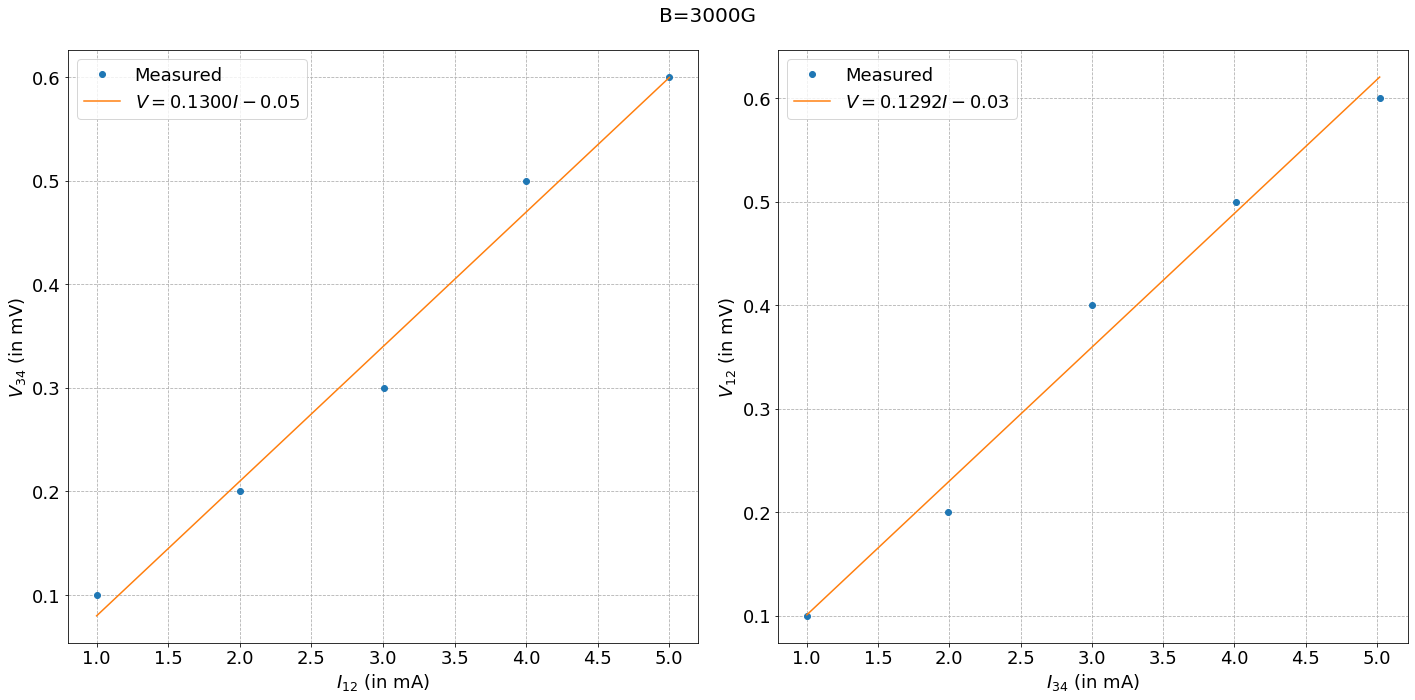

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
files = ['h_e1.csv', 'h_e2.csv']
titles = ["", "", "", ""]
xlabels = ["$I_{12}$ (in mA)", "$I_{34}$ (in mA)"]
ylabels = ["$V_{34}$ (in mV)", "$V_{12}$ (in mV)"]
fig.suptitle("B=3000G", fontsize=20)
R_net = 0
for i in range(2):
    R = plot_one(files[i], titles[i], xlabels[i], ylabels[i], ax=axes[i])
    R_net += R
fig.tight_layout()
# fig.subplots_adjust(top=0.9)
fig.savefig('B3.png', dpi=300)
print(f"R_net = {R_net/2:.4f} Ohm")

R_net = 0.1303 Ohm


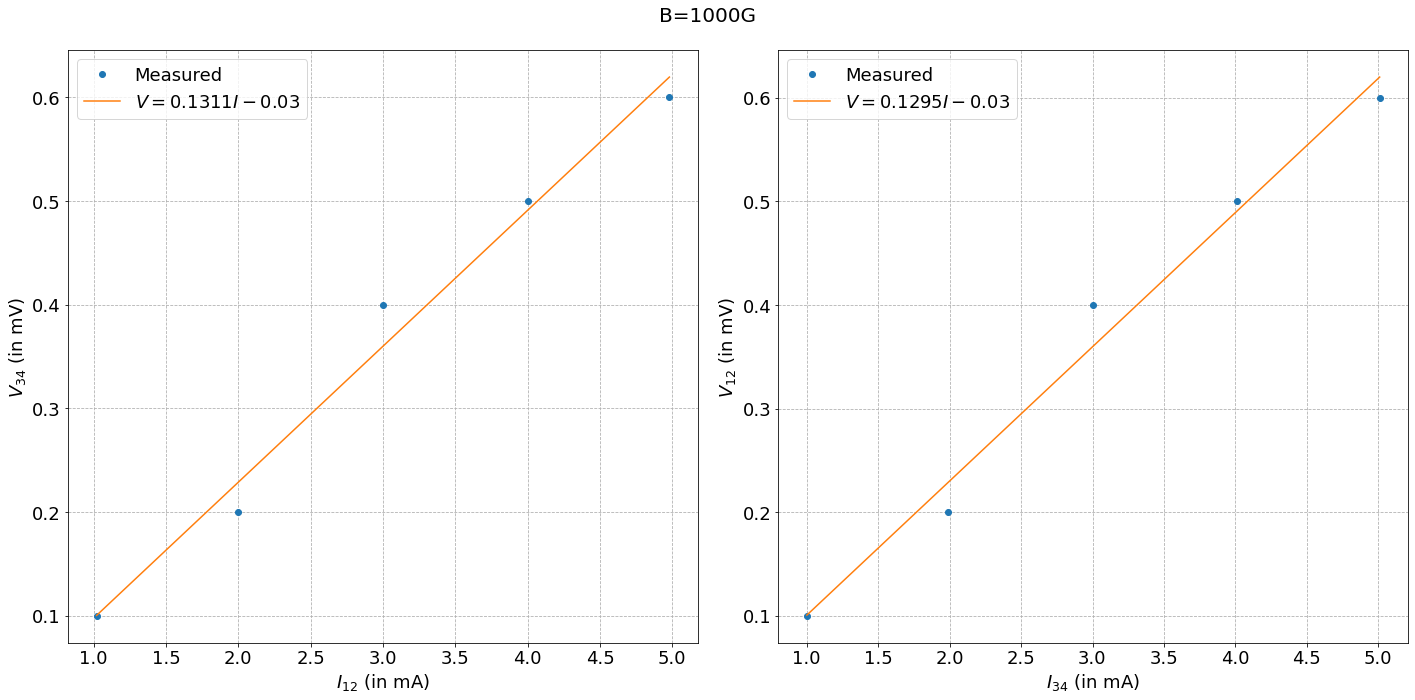

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
files = ['h_e3.csv', 'h_e4.csv']
titles = ["", "", "", ""]
xlabels = ["$I_{12}$ (in mA)", "$I_{34}$ (in mA)"]
ylabels = ["$V_{34}$ (in mV)", "$V_{12}$ (in mV)"]
fig.suptitle("B=1000G", fontsize=20)
R_net = 0
for i in range(2):
    R = plot_one(files[i], titles[i], xlabels[i], ylabels[i], ax=axes[i])
    R_net += R
fig.tight_layout()
# fig.subplots_adjust(top=0.9)
print(f"R_net = {R_net/2:.4f} Ohm")
fig.savefig('B1.png', dpi=300)

In [137]:
print(f"R_net = {R_net/4:.4f} Ohm")

R_net = 0.1299 Ohm


In [123]:
files = ['h1.csv', 'h2.csv', 'h3.csv', 'h4.csv']
for f in files:
    display(pd.read_csv(f))

,I,V
0,1.01,1.2
1,2.00,2.3
2,3.02,3.5
3,4.00,4.7
4,4.99,5.9


,I,V
0,1.00,1.1
1,2.02,2.3
2,3.01,3.5
3,4.00,4.6
4,5.00,5.9


,I,V
0,1.0,1.1
1,2.0,2.3
2,3.0,3.5
3,4.0,4.6
4,5.0,5.8


,I,V
0,1.00,1.2
1,1.99,2.3
2,3.00,3.5
3,4.01,4.7
4,5.02,5.9


In [126]:
files = ['v1.csv', 'v2.csv', 'v3.csv', 'v4.csv']
for f in files:
    display(pd.read_csv(f))

,I,V
0,1.00,1.0
1,2.00,2.0
2,3.01,3.1
3,4.00,4.2
4,5.00,5.2


,I,V
0,1.00,1.0
1,2.02,2.1
2,3.01,3.1
3,4.00,4.1
4,5.00,5.1


,I,V
0,1.02,1.1
1,2.00,2.1
2,3.00,3.1
3,4.00,4.2
4,4.98,5.2


,I,V
0,1.00,1.0
1,1.99,2.0
2,3.00,3.1
3,4.01,4.2
4,5.01,5.2


In [129]:
files = ['h_e1.csv', 'h_e2.csv', 'h_e3.csv', 'h_e4.csv']
for f in files:
    display(pd.read_csv(f))

,I,V
0,1.00,0.1
1,2.00,0.2
2,3.01,0.3
3,4.00,0.5
4,5.00,0.6


,I,V
0,1.00,0.1
1,1.99,0.2
2,3.00,0.4
3,4.01,0.5
4,5.02,0.6


,I,V
0,1.02,0.1
1,2.00,0.2
2,3.00,0.4
3,4.00,0.5
4,4.98,0.6


,I,V
0,1.00,0.1
1,1.99,0.2
2,3.00,0.4
3,4.01,0.5
4,5.01,0.6
